# CM4X part II: Upwelling section

## Map of summer SST

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import cmocean

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
dirstix = "../../fonts/stixfonts/fonts/static_ttf"
import matplotlib.font_manager as font_manager
for font in font_manager.findSystemFonts(dirstix):
    font_manager.fontManager.addfont(font)

# Set font family globally
plt.rcParams['font.family'] = 'STIX Two Text'

In [4]:
sst_composite_cm4x125h = xr.open_dataset("../../data/plotting_ready/cm4x125h_sst_composite_upwelling.nc")["sst"]

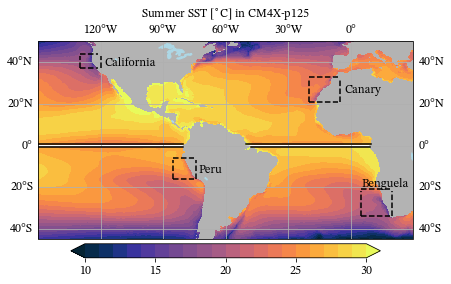

In [5]:
plt.rcParams.update({"font.size":12})

plt.figure(figsize=(6.5,4.0))
ax = plt.axes(projection=ccrs.PlateCarree(), facecolor="white")

p = sst_composite_cm4x125h.plot.contourf(ax=ax, vmin=10, vmax=30, x="geolon", y="geolat",
                                                                   cmap=cmocean.cm.thermal,
                                                                   levels=np.arange(10,31,1),
                                                                   transform=ccrs.PlateCarree(), add_colorbar=False)

ax.add_feature(cfeature.LAKES, color="lightblue")
ax.set_extent([-150, 30, -45, 50], crs=ccrs.PlateCarree())

cbr = plt.colorbar(p, fraction=0.065, orientation="horizontal", pad=0.02)
cbr.set_ticks([10,15,20,25,30])

plt.title("Summer SST [$^{\circ}$C] in CM4X-p125", fontsize=12)

CCS = [-130, -120, 37., 44]
PERU = [-85, -74, -16., -6]
CANA = [-20, -5, 21., 33]
BENG = [5, 20, -34, -21]

# CCS
ax.plot(np.arange(-130,-120,1), 44*np.ones((10)), color="k", linestyle="--", transform=ccrs.PlateCarree())
ax.plot(np.arange(-130,-120,1), 37*np.ones((10)), color="k", linestyle="--", transform=ccrs.PlateCarree())
ax.plot(-130*np.ones((7)), np.arange(37,44,1), color="k", linestyle="--", transform=ccrs.PlateCarree())
ax.plot(-120*np.ones((7)), np.arange(37,44,1), color="k", linestyle="--", transform=ccrs.PlateCarree())

# PERU
ax.plot(np.arange(-85,-74,1), -16*np.ones((11)), color="k", linestyle="--")
ax.plot(np.arange(-85,-74,1), -6*np.ones((11)), color="k", linestyle="--")
ax.plot(-85*np.ones((10)), np.arange(-16,-6,1), color="k", linestyle="--")
ax.plot(-74*np.ones((10)), np.arange(-16,-6,1), color="k", linestyle="--")

# CANA
ax.plot(np.arange(-20,-5,1), 21*np.ones((15)), color="k", linestyle="--")
ax.plot(np.arange(-20,-5,1), 33*np.ones((15)), color="k", linestyle="--")
ax.plot(-20*np.ones((12)), np.arange(21,33,1), color="k", linestyle="--")
ax.plot(-5*np.ones((12)), np.arange(21,33,1), color="k", linestyle="--")

# BENG
ax.plot(np.arange(5,20,1), -21*np.ones((15)), color="k", linestyle="--")
ax.plot(np.arange(5,20,1), -34*np.ones((15)), color="k", linestyle="--")
ax.plot(5*np.ones((13)), np.arange(-34,-21,1), color="k", linestyle="--")
ax.plot(20*np.ones((13)), np.arange(-34,-21,1), color="k", linestyle="--")

ax.plot(np.arange(-179.5, -79.5), -0.75*np.ones(100), color="k", linestyle="-")
ax.plot(np.arange(-179.25, -79.25), +0.65*np.ones(100), color="k", linestyle="-")

ax.plot(np.arange(-50.4, 10.4), +0.65*np.ones(61), color="k", linestyle="-")
ax.plot(np.arange(-47.8, +9.8), -0.75*np.ones(58), color="k", linestyle="-")

ax.add_feature(cfeature.LAND, color=[0.7,0.7,0.7])
#ax.add_feature(cfeature.LAND, color="k")
ax.gridlines(draw_labels=True)

ax.text(-118, 38, "California", transform=ccrs.PlateCarree())
ax.text(-73, -13, "Peru", transform=ccrs.PlateCarree())
ax.text(-3, 25, "Canary", transform=ccrs.PlateCarree())
ax.text(5, -20, "Benguela", transform=ccrs.PlateCarree())

plt.tick_params(labelsize=12)
plt.tight_layout()

plt.draw()

plt.savefig("../../figures/composite_summer_SST_CM4Xp125.jpeg", bbox_inches="tight",
            facecolor="white", dpi=400, format='jpeg')